# PROJECT 2 - LSTM

## Samuel Norris and Arjun Mishra

Please do not start with this notebook.  You should be referred to this notebook by the last section of the main project notebook.

The text data for these models is a portion of the Compendium to the Catechism of the Catholic Church.  The full text in each language can be found at:
1. http://www.vatican.va/archive/compendium_ccc/documents/archive_2005_compendium-ccc_en.html (English)
2. http://www.vatican.va/archive/compendium_ccc/documents/archive_2005_compendium-ccc_fr.html (French)

In [12]:
# Import necessary libraries (some imported later in the code) and read in data

from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys

path_eng = 'compendium_CCC_edited_english.txt'
text_eng = open(path_eng).read().lower()
print('English Corpus Length:\t', len(text_eng))

path_frn = 'compendium_CCC_edited_french.txt'
text_frn = open(path_frn).read().lower()
print('French Corpus Length:\t', len(text_frn))

English Corpus Length:	 258023
French Corpus Length:	 261425


In [13]:
# Get chars from two texts
chars_from_eng = sorted(list(set(text_eng)))
chars_from_frn = sorted(list(set(text_frn)))

# Combine chars from two languages into one chars list
#######################
# Code between hash lines taken from 
# http://stackoverflow.com/questions/2151517/pythonic-way-to-create-union-of-all-values-contained-in-multiple-lists
results_list = [chars_from_eng, chars_from_frn]
chars = list(set().union(*results_list))
#######################

# Get dictionaries of chars and their index in the chars list
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print('Total Chars:\t', len(chars))

Total Chars:	 77


In [14]:
# Break up English text into 5 char segments, shifting one char at a
# time when making new segments
maxlen = 5
step = 1
char5_strings_eng = []
next_chars_eng = []
for i in range(0, len(text_eng) - maxlen, step):
    char5_strings_eng.append(text_eng[i: i + maxlen])
    next_chars_eng.append(text_eng[i + maxlen])
print('English 5-char sequences:\t', len(char5_strings_eng))

# Break up French text into 5 char segments, shifting one char at a
# time when making new segments
maxlen = 5
step = 1
char5_strings_frn = []
next_chars_frn = []
for i in range(0, len(text_frn) - maxlen, step):
    char5_strings_frn.append(text_frn[i: i + maxlen])
    next_chars_frn.append(text_frn[i + maxlen])
print('French 5-char sequences:\t', len(char5_strings_frn))

English 5-char sequences:	 258018
French 5-char sequences:	 261420


In [15]:
# Get the labels for the datasets
# 1=English, 0=French
labels_eng = np.array([1]*len(char5_strings_eng))
labels_frn = np.array([0]*len(char5_strings_frn))

In [16]:
from sklearn.model_selection import train_test_split, cross_val_predict, learning_curve

# Do an 80/20 split to get training and test data for both English and French
training_data_eng, testing_data_eng, training_labels_eng, testing_labels_eng = train_test_split(
        char5_strings_eng, labels_eng, test_size=0.2, random_state=0)

training_data_frn, testing_data_frn, training_labels_frn, testing_labels_frn = train_test_split(
        char5_strings_frn, labels_frn, test_size=0.2, random_state=0)

In [17]:
# Method to vectorize a dataset
def vectorization(char5_strings, maxlen, chars, char_indices, next_chars):
    X = np.zeros((len(char5_strings), maxlen, len(chars)), dtype=np.bool)
    y = np.zeros((len(char5_strings), len(chars)), dtype=np.bool)
    for i, char5_string in enumerate(char5_strings):
        for t, char in enumerate(char5_string):
            X[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1
    return X, y

In [18]:
X_train_eng, X_train_labels_eng = vectorization(training_data_eng, maxlen, chars, char_indices, next_chars_eng)
X_test_eng, X_test_labels_eng = vectorization(testing_data_eng, maxlen, chars, char_indices, next_chars_eng)

X_train_frn, X_train_labels_frn = vectorization(training_data_frn, maxlen, chars, char_indices, next_chars_frn)
X_test_frn, X_test_labels_frn = vectorization(testing_data_frn, maxlen, chars, char_indices, next_chars_frn)

In [19]:
# Build the English model: a single LSTM
print('Building English model')
model_eng = Sequential()
model_eng.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_eng.add(Dense(len(chars)))
model_eng.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model_eng.compile(loss='categorical_crossentropy', optimizer=optimizer)


# Build the French model: a single LSTM
print('Building French model')
model_frn = Sequential()
model_frn.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_frn.add(Dense(len(chars)))
model_frn.add(Activation('softmax'))

model_frn.compile(loss='categorical_crossentropy', optimizer=optimizer)

Building English model
Building French model


In [20]:
# train the English model
for iteration in range(1, 30): # Make it 26
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model_eng.fit(X_train_eng, X_train_labels_eng,
              batch_size=128,
              epochs=3)


--------------------------------------------------
Iteration 1
Epoch 1/3
206414/206414 [==============================] - 39s - loss: 3.1000    
Epoch 2/3
206414/206414 [==============================] - 39s - loss: 3.0928    
Epoch 3/3
206414/206414 [==============================] - 38s - loss: 3.0919    

--------------------------------------------------
Iteration 2
Epoch 1/3
206414/206414 [==============================] - 37s - loss: 3.0910    
Epoch 2/3
206414/206414 [==============================] - 37s - loss: 3.0920    
Epoch 3/3
206414/206414 [==============================] - 37s - loss: 3.0928    

--------------------------------------------------
Iteration 3
Epoch 1/3
206414/206414 [==============================] - 37s - loss: 3.0929    
Epoch 2/3
206414/206414 [==============================] - 37s - loss: 3.0939    
Epoch 3/3
206414/206414 [==============================] - 37s - loss: 3.0937    

--------------------------------------------------
Iteration 4
Epoch 

In [21]:
# train the French model
for iteration in range(1, 30): # Make this 26
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model_frn.fit(X_train_frn, X_train_labels_frn,
              batch_size=128,
              epochs=3)


--------------------------------------------------
Iteration 1
Epoch 1/3
209136/209136 [==============================] - 44s - loss: 3.1439    
Epoch 2/3
209136/209136 [==============================] - 44s - loss: 3.1371    
Epoch 3/3
209136/209136 [==============================] - 43s - loss: 3.1361    

--------------------------------------------------
Iteration 2
Epoch 1/3
209136/209136 [==============================] - 44s - loss: 3.1376    
Epoch 2/3
209136/209136 [==============================] - 45s - loss: 3.1402    
Epoch 3/3
209136/209136 [==============================] - 45s - loss: 3.1406    

--------------------------------------------------
Iteration 3
Epoch 1/3
209136/209136 [==============================] - 43s - loss: 3.1423    
Epoch 2/3
209136/209136 [==============================] - 43s - loss: 3.1418    
Epoch 3/3
209136/209136 [==============================] - 43s - loss: 3.1414    

--------------------------------------------------
Iteration 4
Epoch 

In [28]:
# Create the 200 test data
test_data_200 = np.zeros((200, maxlen, len(chars)), dtype=np.bool)

# Pick 100 substrings at random from each language
eng_test_indices = np.random.randint(0, X_test_eng.shape[0], size=100)
frn_test_indices = np.random.randint(0, X_test_frn.shape[0], size=100)

# Fill the data
test_data_200[:100] = X_test_eng[eng_test_indices,:,:]
test_data_200[100:] = X_test_frn[frn_test_indices,:,:]

# Create the labels
test_labels_200 = np.concatenate(([1]*100, [0]*100))

In [29]:
# Vectorize test string
def test_vectorization(test_string, maxlen, chars, char_indices):
    # Create array to handle broken up test string
    test_string_data = []
    
    # Break up test string
    for ind in range(min(maxlen, len(test_string))):
        test_string_data.append(test_string[:ind])
   
    # Create X
    X = np.zeros((len(test_string_data), maxlen, len(chars)), dtype=np.bool)
    for i, test_string_entry in enumerate(test_string_data):
        for t, char in enumerate(test_string_entry):
            X[i, t, char_indices[char]] = 1
    return X

In [30]:
test_predict_200 = np.zeros(200)
test_y_hat_200 = np.zeros(200)

for t in range(test_data_200.shape[0]):
    letter_string = ''
    for letter in range(maxlen):
        letter_ind = np.where(test_data_200[t,letter,:]==1)[0][0]
        letter_string += chars[letter_ind]
    letter_string_vect = test_vectorization(letter_string, maxlen, chars, char_indices)
    
    test_predict_eng = model_eng.predict(letter_string_vect, batch_size=1, verbose=1)
    test_predict_frn = model_frn.predict(letter_string_vect, batch_size=1, verbose=1)
    total_prob_eng = 1
    total_prob_frn = 1
    for p in range(len(test_predict_eng)):
        """if len(np.where(test_data_200[t,p,:]==1)[0]) == 0:
            print('BREAK')
            break"""
        char_ind = np.where(test_data_200[t,p,:]==1)[0][0]
        # English probability
        char_prob_eng = test_predict_eng[p, char_ind]
        total_prob_eng *= char_prob_eng
        # French probability
        char_prob_frn = test_predict_frn[p, char_ind]
        total_prob_frn *= char_prob_frn
    prediction = 1 if (np.log(total_prob_eng) > np.log(total_prob_frn)) else 0
    test_predict_200[t] = prediction
    test_y_hat_200[t] = np.log(total_prob_eng) - np.log(total_prob_frn)

1/5 [=====>........................] - ETA: 0s

In [31]:
accuracy_vect = np.nonzero(test_labels_200 - test_predict_200)
accuracy = 1 - (len(accuracy_vect[0]) / 200.)
print(accuracy)

0.6950000000000001


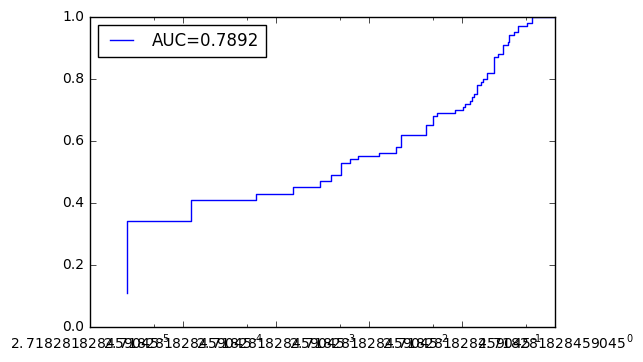

In [33]:
# Code from
# http://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python

from sklearn import metrics
import matplotlib.pyplot as plt
import math

plt.figure(0).clf()

auc = metrics.roc_auc_score(test_labels_200, test_y_hat_200)
fpr, tpr, thresholds = metrics.roc_curve(test_labels_200, test_y_hat_200)
plt.semilogx(basex = math.e)
plt.plot(fpr, tpr, label="AUC="+str(auc))
#plt.plot([0, 1], [0, 1], color='gray')

plt.legend(loc=0)
plt.show()

The accuracy achieved here was superior to the basic model assigned in this project.  We are not surprised by this fact, as much more training data was used.  The AUC was also very nice.